## Spotify Global Music Trends (2009-2025)
In this project, I explore global music trends using Spotify data from 2009 to 2025.
The goal is to analyse how audio features and popularity have changed over time.

In [23]:
# Import libraries
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Download dataset
path = kagglehub.dataset_download("wardabilal/spotify-global-music-dataset-20092025")

# Show files in a folder
print("Files in dataset folder:", os.listdir(path))

# Rename the file
#file_path_1 = os.path.join(path, "track_data_final.csv")
file_path= os.path.join(path, "spotify_data clean.csv")

# Load data
#df = pd.read_csv(file_path_1)
df = pd.read_csv(file_path)
df.head()

Files in dataset folder: ['spotify_data clean.csv', 'track_data_final.csv']


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


## Data inspection & Cleaning the Data
- Remove duplicates
- Handle missing values
- Convert date/year columns

In [24]:
# Basic info
df.info()
df.describe(include="all").T

# Columns overview
print(df.columns.tolist())

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

# Convert release date to datetime and extract year
if "album_release_date" in df.columns:
    df["album_release_date"] = pd.to_datetime(df["album_release_date"], errors="coerce")
    df["year"] = df["album_release_date"].dt.year

# Final shape
print("After cleaning:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

## Exploratory Data Analysis (EDA)


In [25]:
# Sort by popularity
popular_songs = df.sort_values(by="track_popularity", ascending=False).head(10)
popular_songs[["track_name", "artist_name", "track_popularity"]]

,track_name,artist_name,track_popularity
457,Golden,HUNTR/X,99
88,Opalite,Taylor Swift,97
101,Elizabeth Taylor,Taylor Swift,95
337,Man I Need,Olivia Dean,95
1134,BIRDS OF A FEATHER,Billie Eilish,94
103,Father Figure,Taylor Swift,94
450,Soda Pop,Saja Boys,94
97,Wood,Taylor Swift,93
96,Wi$h Li$t,Taylor Swift,93
95,CANCELLED!,Taylor Swift,93


In [26]:
# Count number of songs per artist
artist_count = df["artist_name"].value_counts().head(10)
artist_count

artist_name
Taylor Swift         324
The Weeknd           141
Lana Del Rey          99
Ariana Grande         94
Nirvana               91
Drake                 84
Post Malone           83
The Neighbourhood     77
Lady Gaga             70
Olivia Rodrigo        68
Name: count, dtype: int64

## Visualisations
- Bar Chart (Top Artists)
- Scatter Plot (Artist Popularity vs Track Popularity)
- Scate Plot (Track Popularity vs Track Duration)

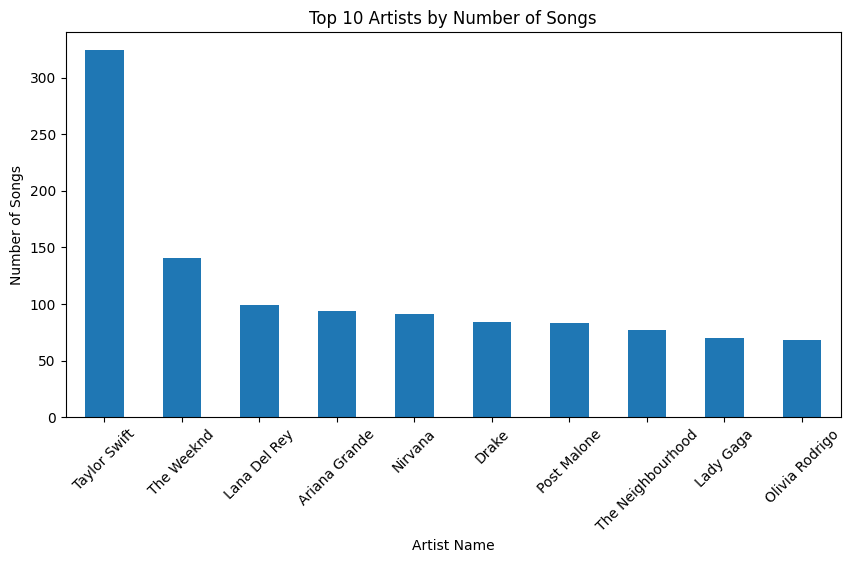

In [27]:
# Bar chart
plt.figure(figsize=(10, 5))
artist_count.plot(kind="bar")
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Artist Name")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()

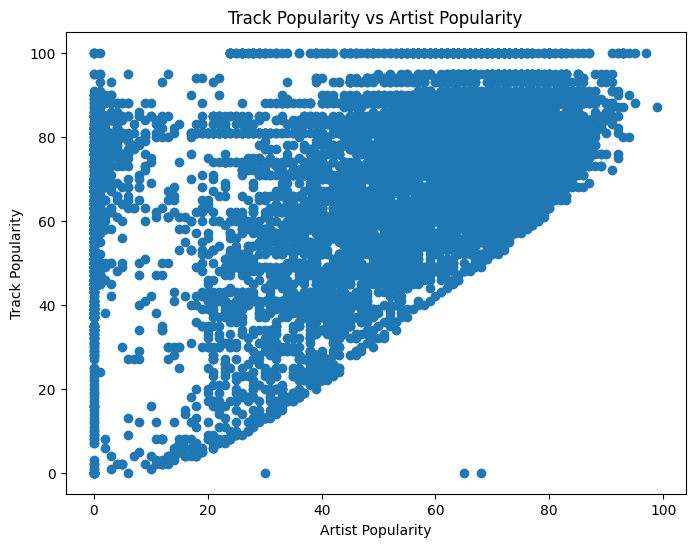

In [28]:
# Scatter plot (artist popularity vs track popularity)
plt.figure(figsize=(8, 6))
plt.scatter(df["track_popularity"], df["artist_popularity"])
plt.title("Track Popularity vs Artist Popularity")
plt.xlabel("Artist Popularity")
plt.ylabel("Track Popularity")
plt.show()

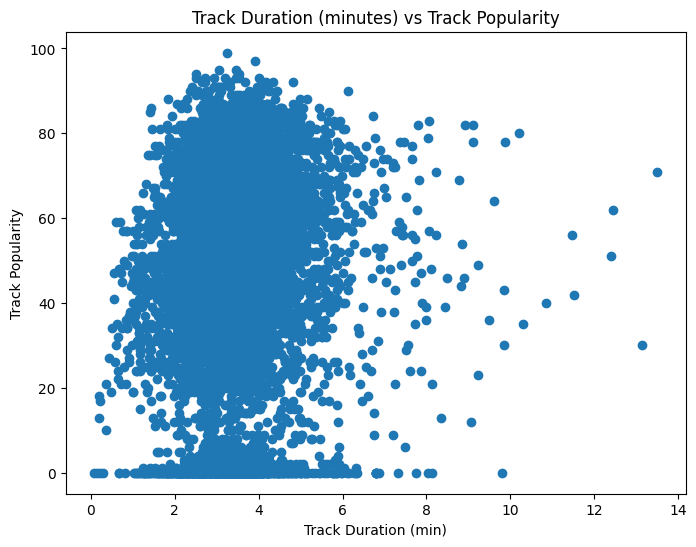

In [29]:
# Scatter plot (track duration vs track popularity)
plt.figure(figsize=(8, 6))
plt.scatter(df["track_duration_min"], df["track_popularity"])
plt.title("Track Duration (minutes) vs Track Popularity")
plt.xlabel("Track Duration (min)")
plt.ylabel("Track Popularity")
plt.show()

## Trend Analysis--Songs Released per Year

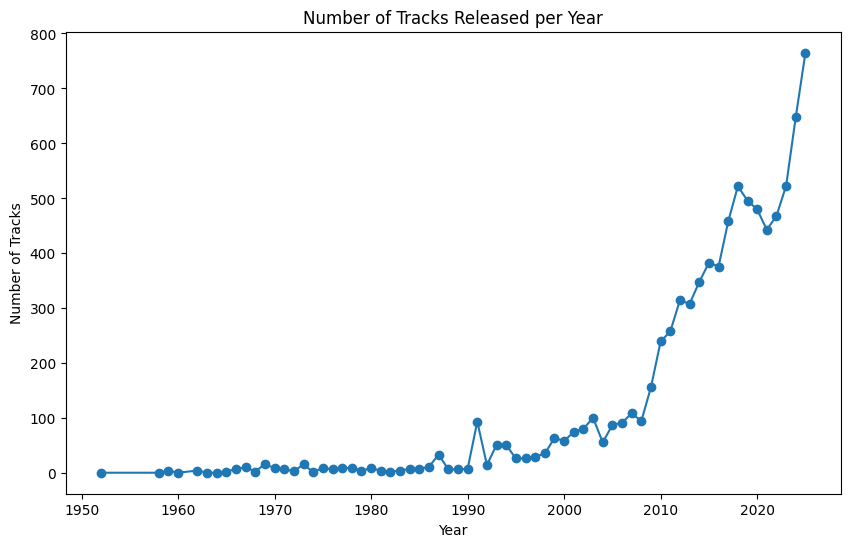

In [30]:
# Convert to daytime
df["album_release_date"] = pd.to_datetime(df["album_release_date"], errors="coerce")

# Extract year
df["release_year"] = df["album_release_date"].dt.year

# Count tracks per year
year_trend = df["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_trend.plot(kind="line", marker="o")
plt.title("Number of Tracks Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.show()